# Lección 2: CONCEPTOS BÁSICOS DE ESTADÍSTICA DESCRIPTIVA
## Objetivo : Aplicar conceptos de tendencia central, dispersión y medidas de posición.

In [ ]:
import pandas as pd

# Importamos data creado anteriormente
data = pd.read_csv("data/comercioya.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   edad                    300 non-null    int64  
 1   genero                  300 non-null    object 
 2   visitas_web             300 non-null    int64  
 3   compras                 300 non-null    int64  
 4   monto_total             300 non-null    float64
 5   devoluciones            300 non-null    int64  
 6   calificacion            300 non-null    int64  
 7   categoria_favorita      300 non-null    object 
 8   suscripcion_newsletter  300 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 21.2+ KB


In [66]:
# MEDIDAS DE TENDENCIA CENTRAL MANUAL (POR SEPARADO)
# Usarmos numeryc_only para incluir exclusivamente columnas con datos numericos en los cálculos , evitando errores de valor

# MEDIA
data.mean(numeric_only=True)

edad                43.320000
visitas_web         10.050000
compras              3.006667
monto_total     153940.714764
devoluciones         1.060000
calificacion         3.126667
dtype: float64

In [67]:
# MEDIANA
data.median(numeric_only=True)

edad                43.500000
visitas_web         10.000000
compras              3.000000
monto_total     156318.508317
devoluciones         1.000000
calificacion         3.000000
dtype: float64

In [58]:
# VARIANZA
data.var(numeric_only=True)

edad            2.349073e+02
visitas_web     9.539298e+00
compras         2.862832e+00
monto_total     2.298838e+09
devoluciones    1.006421e+00
calificacion    1.883567e+00
dtype: float64

In [59]:
# DESVIACIÓN ESTÁNDAR
data.std(numeric_only=True)

edad               15.326686
visitas_web         3.088575
compras             1.691990
monto_total     47946.196190
devoluciones        1.003206
calificacion        1.372431
dtype: float64

In [60]:
# MEDIDAS DE TENDENCIA CENTRAL UTILIZANDO DESCRIBE
# Entrega la información completa del dataset, pero en este caso especificamos numeric_only=True usando los métodos por separado, así generamos resultados limpios de errores
data.describe()

,edad,visitas_web,compras,monto_total,devoluciones,calificacion
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,43.320000,10.050000,3.006667,153940.714764,1.060000,3.126667
std,15.326686,3.088575,1.691990,47946.196190,1.003206,1.372431
min,18.000000,3.000000,0.000000,18810.588223,0.000000,1.000000
25%,30.000000,8.000000,2.000000,119482.663344,0.000000,2.000000
50%,43.500000,10.000000,3.000000,156318.508317,1.000000,3.000000
75%,56.000000,12.000000,4.000000,184468.355332,2.000000,4.000000
max,69.000000,19.000000,8.000000,283675.548520,5.000000,5.000000


In [10]:
# CUARTILES Y PERCENTILES (De las variables numericas)
import pandas as pd
data = pd.read_csv("data/comercioya.csv")
variables_numericas = ["edad", "visitas_web", "compras", "monto_total", "devoluciones", "calificacion"]

# Generamos un ciclo con las variables numericas
for col in variables_numericas:
    print(f"\nCuartiles de {col}")
    print(data[col].quantile([0.25, 0.5, 0.75]))
             


Cuartiles de edad
0.25    30.0
0.50    43.5
0.75    56.0
Name: edad, dtype: float64

Cuartiles de visitas_web
0.25     8.0
0.50    10.0
0.75    12.0
Name: visitas_web, dtype: float64

Cuartiles de compras
0.25    3.0
0.50    4.0
0.75    5.0
Name: compras, dtype: float64

Cuartiles de monto_total
0.25    110432.431499
0.50    139705.884154
0.75    184798.419064
Name: monto_total, dtype: float64

Cuartiles de devoluciones
0.25    0.0
0.50    0.0
0.75    1.0
Name: devoluciones, dtype: float64

Cuartiles de calificacion
0.25    3.855050
0.50    4.696183
0.75    5.000000
Name: calificacion, dtype: float64


In [69]:
# PERCENTILES
P10 = data["monto_total"].quantile(0.10)
P90 = data["monto_total"].quantile(0.90)

print("Percentil 10:", P10)
print("Percentil 90:", P90)

Percentil 10: 93804.65549828018
Percentil 90: 213724.30955161687


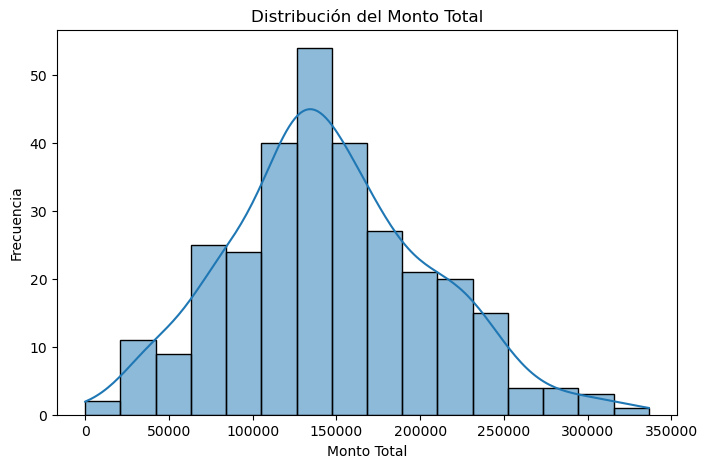

In [9]:
# HISTOGRAMAS Y BOXPLOTS
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data["monto_total"], kde=True)
plt.title("Distribución del Monto Total")
plt.xlabel("Monto Total")
plt.ylabel("Frecuencia")
plt.show()

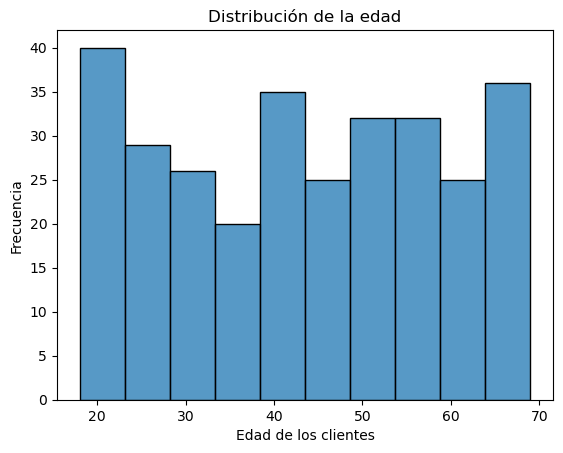

In [8]:
# DISTRIBUCIÓN DE LA EDAD
sns.histplot(data["edad"])
plt.title("Distribución de la edad")
plt.xlabel("Edad de los clientes")
plt.ylabel("Frecuencia")
plt.show()

Podemos observar que la edad de los clientes frecuente más en los 20 y 70 años.
Desde los 20 a los 40 años la frecuencia desciende, para luego ser irregular.

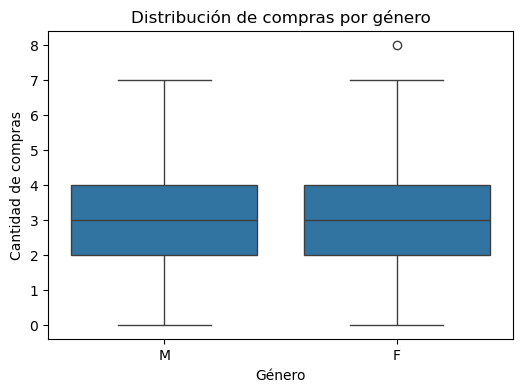

In [72]:
# BOXPLOT
plt.figure(figsize=(6,4))
sns.boxplot(
    data=data,
    x="genero",
    y="compras"
)
plt.title("Distribución de compras por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de compras")
plt.show()

Si bien no tienen diferencia la distribución de las compras en ambos géneros, si podemos ver un valor elevado en el género femenino.

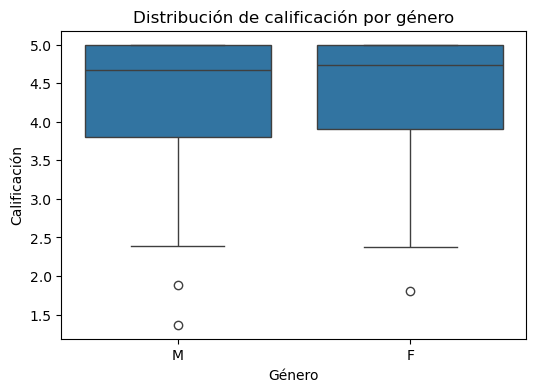

In [6]:
# DISTRIBUCIÓN DE CALIFICACIÓN POR GÉNERO
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(
    data=data,
    x="genero",
    y="calificacion"
)
plt.title("Distribución de calificación por género")
plt.xlabel("Género")
plt.ylabel("Calificación")
plt.show()

In [7]:
# IDENTIFICAR VALORES ATÍPICOS FORMALMENTE (IQR)
Q1 = data["monto_total"].quantile(0.25)
Q3 = data["monto_total"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = data[(data["monto_total"] < limite_inferior) | 
                (data["monto_total"] > limite_superior)]

print("Cantidad de outliers:", len(outliers))

Cantidad de outliers: 4


**Se identificaron 4 valores atípicos en la variable monto_total.** <br>
    Estos representan clientes con niveles de gasto significativamente superiores al promedio.<br>
    Su presencia en el dataset incrementa la desviación estándar y puede afectar modelos predictivos si no se manejan adecuadamente.<br>
    Dado que estamos en un ambiente e-commerce, estos valores atípicos representan clientes premiun ( Clientes VIP), no representan un mayor impacto en las métricas, por ende, no realizamos tratamiento de ellos